In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn import svm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
import time


In [2]:
df = pd.read_csv('../0.Datasets/processed/processed_car_data.csv').iloc[:100, :]
# df = pd.read_csv('../0.Datasets/processed/sliced_car_data.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_day,sale_date
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue,2014-12-16 12:30:00
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue,2014-12-16 12:30:00
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,2015-01-15 04:30:00
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu,2015-01-29 04:30:00
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu,2014-12-18 12:30:00


In [3]:
x = df[['condition', 'odometer','mmr']]
x.head()

,condition,odometer,mmr
0,5.0,16639.0,20500.0
1,5.0,9393.0,20800.0
2,45.0,1331.0,31900.0
3,41.0,14282.0,27500.0
4,43.0,2641.0,66000.0


In [4]:
y = df['sellingprice']
y.head()

0    21500.0
1    21500.0
2    30000.0
3    27750.0
4    67000.0
Name: sellingprice, dtype: float64

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state= 0)

In [6]:
numeric_features = ['condition', 'odometer','mmr',]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [7]:
prepocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),

])

In [8]:
svc_pipeline = Pipeline(steps=[
    ('prepocessor', prepocessor), 
    ('regressor', svm.SVC())
])

In [9]:
svc_pipeline.fit(x_train, y_train)

Pipeline(steps=[('prepocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['condition', 'odometer',
                                                   'mmr'])])),
                ('regressor', SVC())])

In [10]:
y_predict = svc_pipeline.predict(x_test)
y_predict

array([30000., 30000., 30000., 30000., 65000., 30000., 10000., 20750.,
       30000., 65000., 12000., 10000., 30000., 20750., 20750., 13700.,
       30000., 65000., 30000., 30000., 30000., 10000., 30000., 30000.,
       65000., 10000., 65000., 30000., 65000., 20750.])

In [11]:
print(np.array(y_test))

[32500. 21500. 30000. 20500. 61500. 41500.  4200. 13600. 40000. 67200.
 11500. 13200. 22250. 21500.  9800. 11500. 14700. 65000. 44500. 32250.
 30000. 11000. 27750. 26500. 51700. 21250. 65000. 21000. 65801. 13000.]


In [12]:
print(r2_score(y_predict, y_test))

0.8349986898852885


In [13]:
print(mean_absolute_error(y_test, y_predict))
print(mean_squared_error(y_test, y_predict))

5563.366666666667
53719386.7


In [14]:
# Hyperparamter tuning

In [15]:
param_grid = {
    "regressor__C":[0.1,1,10,100],
    'regressor__gamma':[1,0.1,0.01,0.001],
    "regressor__kernel":['linear','rbf', 'poly']
}

In [16]:
grid_search = GridSearchCV(estimator=svc_pipeline, param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           scoring='r2')

In [17]:
start = time.time()
grid_search.fit(x_train, y_train)
end = time.time()
print(f"excution time :{end - start}")


c:\Users\AjayPatil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


excution time :7.2427685260772705


In [18]:
grid_search.best_params_

{'regressor__C': 100, 'regressor__gamma': 1, 'regressor__kernel': 'poly'}

In [19]:
best_model = grid_search.best_estimator_

In [20]:
print(best_model)

Pipeline(steps=[('prepocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['condition', 'odometer',
                                                   'mmr'])])),
                ('regressor', SVC(C=100, gamma=1, kernel='poly'))])


In [21]:
y_predict = best_model.predict(x_test)

In [22]:
print(r2_score(y_predict, y_test))

0.9115433446658256


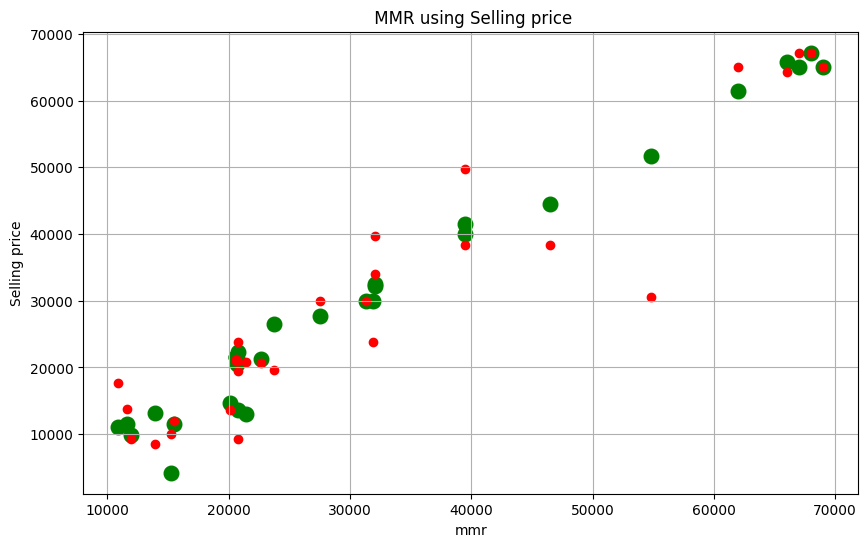

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(x_test['mmr'],y_test, color= 'green', s= 110)
plt.scatter(x_test['mmr'],y_predict, color= 'red')

plt.xlabel("mmr")
plt.ylabel("Selling price")
plt.title(" MMR using Selling price")

plt.grid()
plt.savefig('./Graph/2.selling_price_prediction.png')
plt.show()